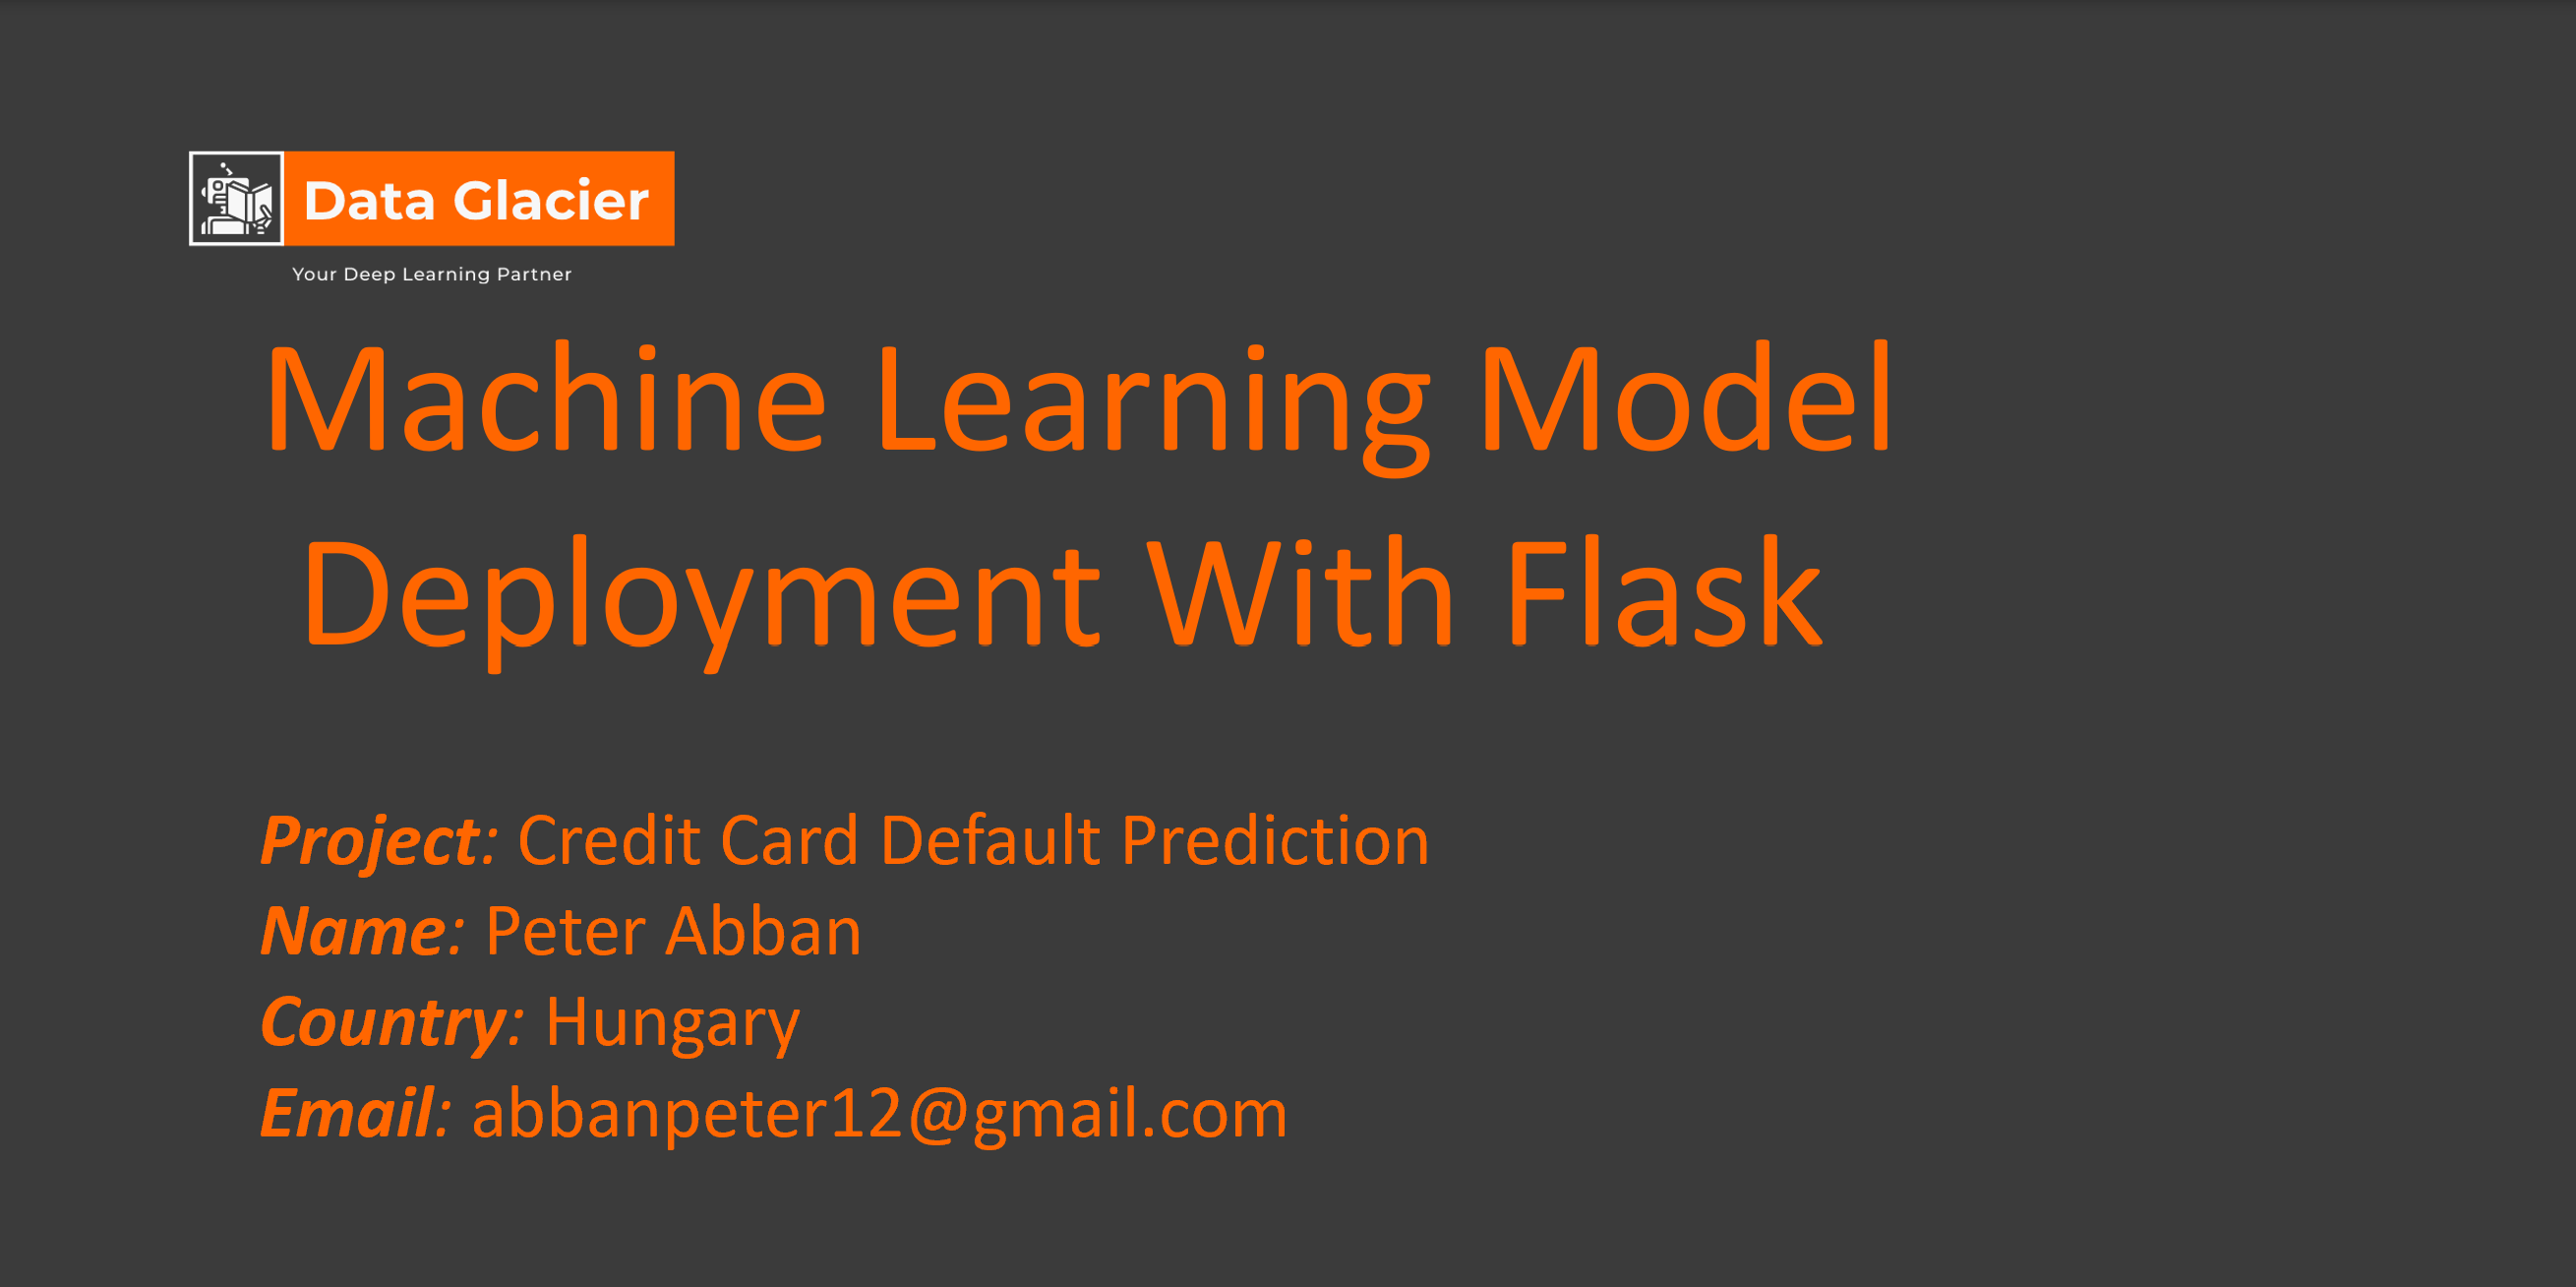

# **Project: Default of Credit Card Clients**

## I. **Project Details:**

**This project involves the analysis and prediction of the credit card default used by customers for payment in Taiwan**

## II. **Dataset Description** 

**The dataset is _multivariate_ business type dataset with 30000 instances or rows and has 25 feature variables. Some of the variables involved are **_Age_**, **_Gender_**, **_Education_**, **_ID_**, **_History of past payment_****

## 1. **Importing the Dependencies:**

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

# Models for the Classifications
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression

# Metrics Measure
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print("All library loaded successfully")
plt.style.use("ggplot")
pd.set_option("display.max_columns", 200)

All library loaded successfully


## 2. **Loading all datasets:**

In [2]:
card_default = pd.read_csv("default of credit card clients.csv")

## 3. Feature Enginering Process: **_Understanding Dataset_**
 * **Head or First 5 rows of data**
 * **Size of dataset: shape**
 * **Data columns**
 * **Data types and the number of these categorical: Nominal and Ordinal data types:**
 * **Information about dataset**
 * **Statistical description of dataset**
 * **Checking for NaN or missing values and sort in ascending order for clarity**

### i. **Head or First 5 rows of data**

In [3]:
card_default.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,dpnm
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### **ii. Size of dataset: Shape**

In [4]:
card_default.shape

(30000, 25)

#### **Observation**: Dataset is made of **30000 rows** and **25 feature columns**

### **iii. Data columns**

In [5]:
card_default.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'dpnm'],
      dtype='object')

### **iv. Data types and the number of these categorical: Nominal and Ordinal data types:**

In [6]:
ordinal_col = card_default.select_dtypes(include = ["number"]).columns.to_list()

In [7]:
ordinal_col

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'dpnm']

In [8]:
len(ordinal_col)

25

#### **Observation**: **All the feature columns are numerical data or ordinal data type**

### **iv. Information About Dataset**

In [9]:
card_default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_1      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

#### **Observation**: We have all feature columns having **_30000 non-null rows_** with each having the **_int64 datatype_**
#### **We also have no NaN values in the dataset**

### **vi. Statistical description of dataset**

In [11]:
card_default.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_1,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


## 4. Feature Enginering Process: **_First Data Cleaning Steps_**

*  **Identifying duplicates: General duplicates checking**
*  **Dropping off irrelevant columns or applying data imputation**
*  **Changing of misappropriated data types**
*  **Renaming data columns if necessary**
*  **Checking for missing valus or NaN values**
*  **Checking for Duplicates by individual column feature names**
*  **Column splitting if necessary for clarity**
*  **Feature creation**
*  **Replacement of regular expressions if any feature columns**
*  **Proper alignment or positioning of feature columns**

### **i. Identifying duplicates: General duplicates checking**

In [12]:
card_default.duplicated(keep = "first").value_counts()

False    30000
Name: count, dtype: int64

### **ii. Dropping off irrelevant columns or applying data imputation**

In [13]:
card_default.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'dpnm'],
      dtype='object')

In [14]:
card_default.drop(columns = ["ID"], inplace = True, axis = 1)

In [15]:
card_default.head(3)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,dpnm
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


### **iii. Renaming data columns if necessary**

In [16]:
card_default.rename({"dpnm":"DEFAULT_PAYMENT"}, inplace = True, axis = 1)

In [17]:
card_default.head(3)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_PAYMENT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


## 5. **Data Explorative Analysis:**

#### **a.Correlation matrix to understand Relationship Between Feature Variables**

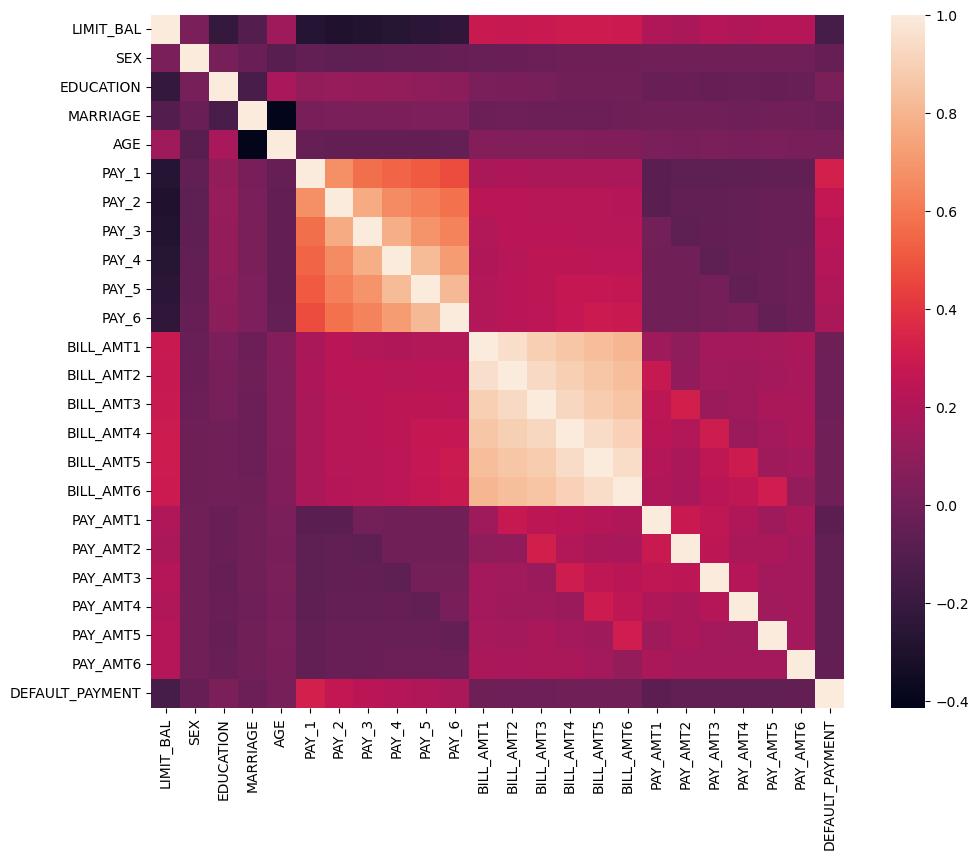

In [86]:
Cormat = card_default.corr()
fig = plt.figure(figsize =(12,9))
sns.heatmap(Cormat, vmax = 1.0, square =True)
plt.show()

#### **_Observation_**: Majority of the **_feature variables_** show less or no correlation with other feature variables. Eg: **_Pay_1 - Pay_6_** is less correlated with **_BILL_ATM1 - BILL_ATM6_** and also with **_PAY_ATM1 - PAY_ATM6_**. This evidence of _less or no correlation among the feature_ variables improves the model's prediction performance of the target variable: **Default_Payment**

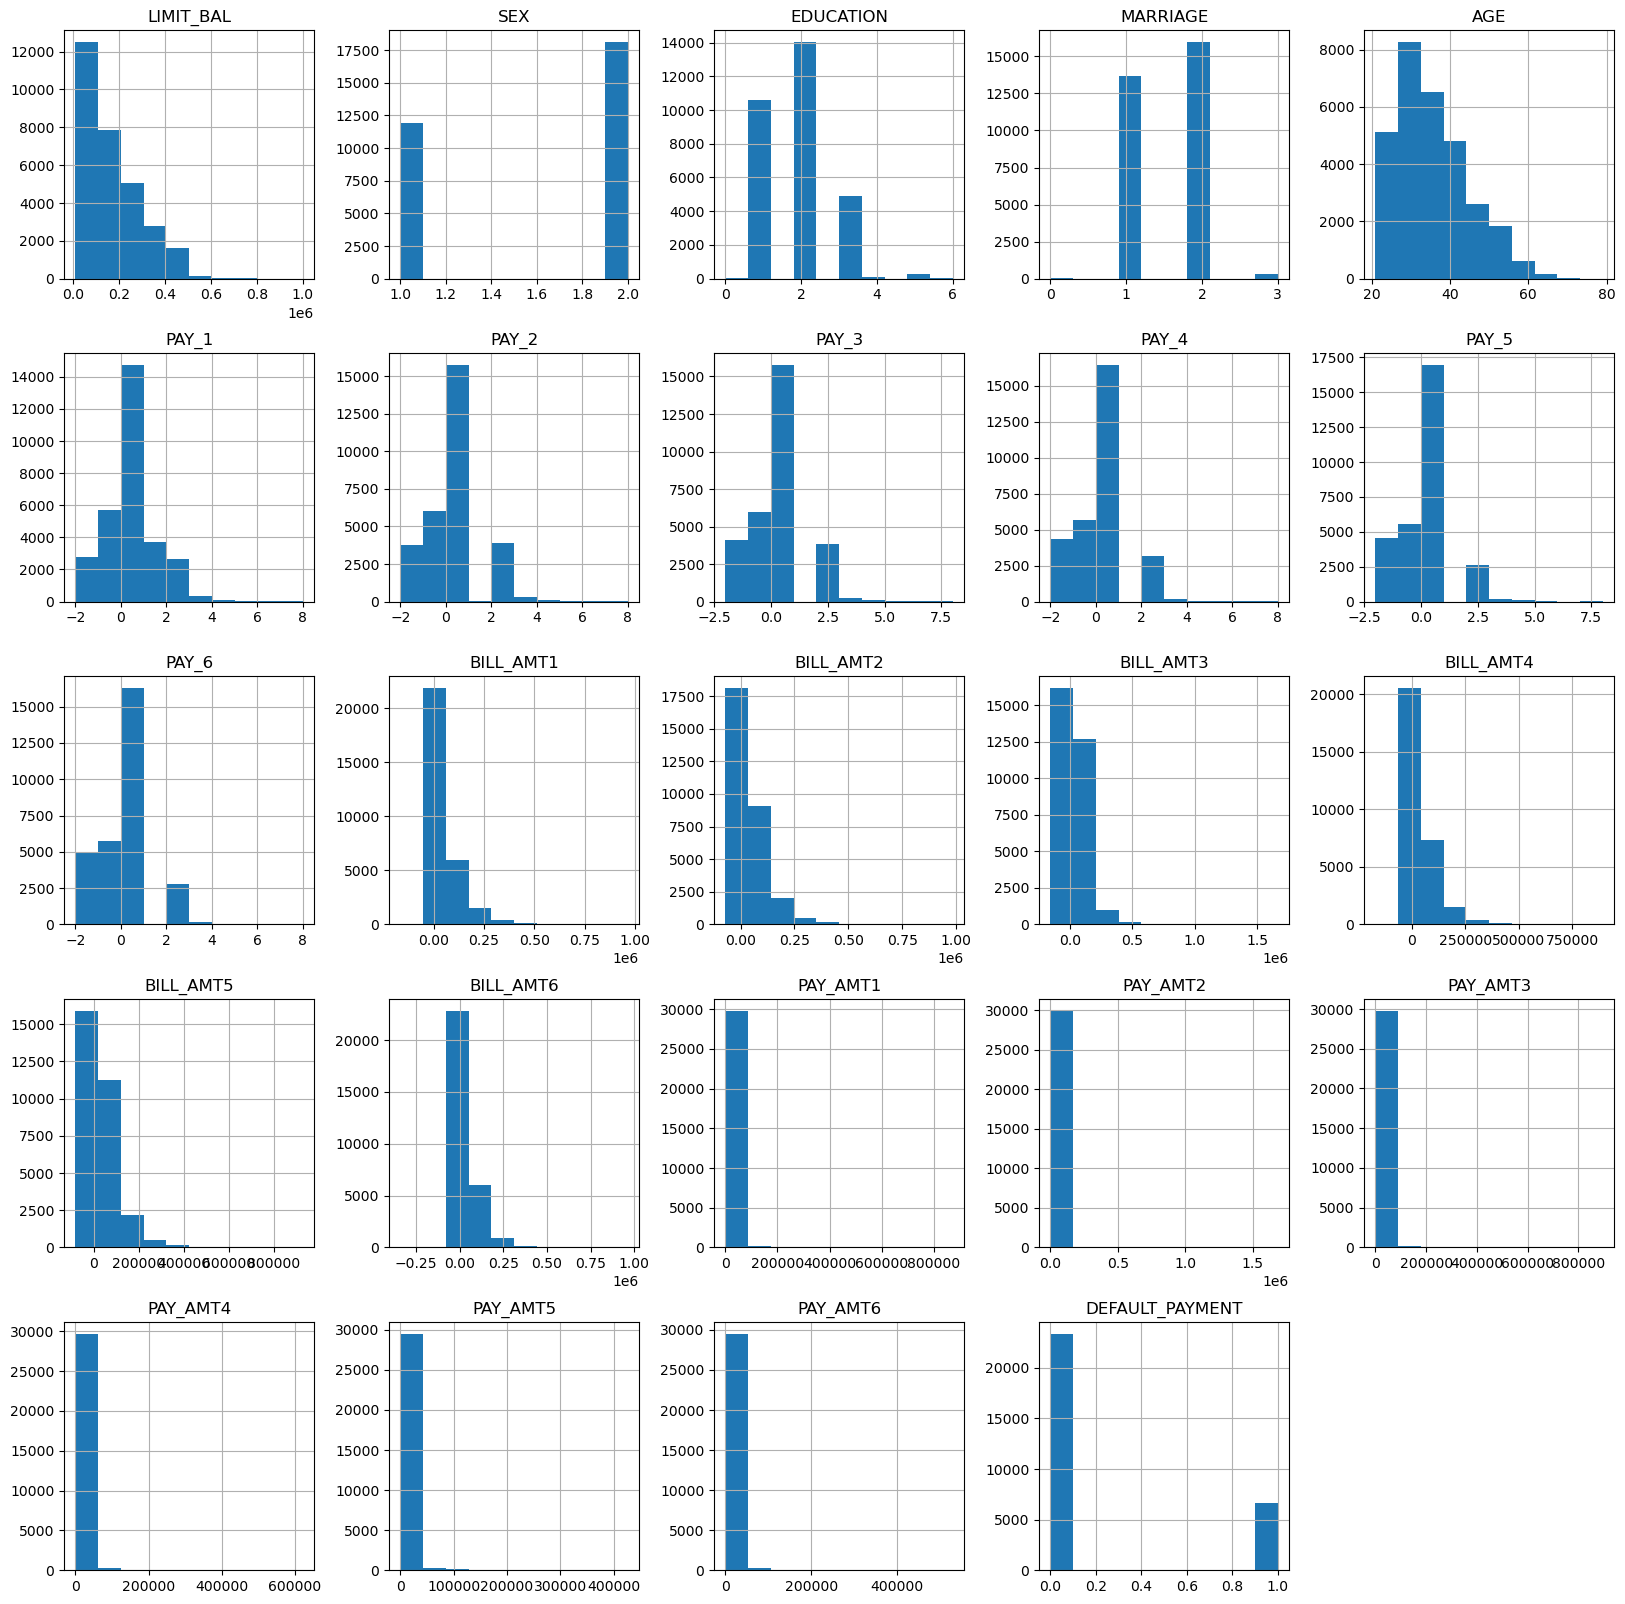

In [96]:
card_default.hist(figsize = (20,20))
plt.show()

## 6. **Model Building: Logistic Regression, Xgboost and RandomForest:**

#### **a. Data splitting into feature and target variables**

In [18]:
card_default.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_PAYMENT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [41]:
X_feature = card_default.drop(columns = ["DEFAULT_PAYMENT"], axis = 1)

In [42]:
Y_target = card_default["DEFAULT_PAYMENT"]

In [43]:
X_feature.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [22]:
Y_target.value_counts()

DEFAULT_PAYMENT
0    23364
1     6636
Name: count, dtype: int64

#### **Observation**: **0 ---> Not default payment and 1---> Default Payment**

#### **b. Performing Data Standardization or Normalization**

In [23]:
Scaler = StandardScaler()
X_feature = Scaler.fit_transform(X_feature)

In [24]:
X_feature

array([[-1.13672015,  0.81016074,  0.18582826, ..., -0.30806256,
        -0.31413612, -0.29338206],
       [-0.3659805 ,  0.81016074,  0.18582826, ..., -0.24422965,
        -0.31413612, -0.18087821],
       [-0.59720239,  0.81016074,  0.18582826, ..., -0.24422965,
        -0.24868274, -0.01212243],
       ...,
       [-1.05964618, -1.23432296,  0.18582826, ..., -0.03996431,
        -0.18322937, -0.11900109],
       [-0.67427636, -1.23432296,  1.45111372, ..., -0.18512036,
         3.15253642, -0.19190359],
       [-0.90549825, -1.23432296,  0.18582826, ..., -0.24422965,
        -0.24868274, -0.23713013]])

#### **c. Splitting data into training and testing samples**

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X_feature, Y_target, test_size = 0.2)

In [26]:
X_train.shape

(24000, 23)

In [27]:
X_test.shape

(6000, 23)

### **_Observation_**: **Since the dataset is more skewed towards the _Not default of 0_ _than the default side of 1_ we consider multiple ML models to select the best model without being bias**

#### **d. Model Building Pipline**

In [28]:
def FitModel(X,Y, algo_name, algorithm, gridSearchParams, cv):
    np.random.seed(10)
    x_train, x_test, y_train, y_test = train_test_split (X,Y, test_size = 0.2)

    grid = GridSearchCV(estimator =algorithm, param_grid = gridSearchParams, cv = cv, scoring = "accuracy", verbose = 1, n_jobs = -1)

    grid_results = grid.fit(x_train, y_train)
    best_params = grid_results.best_params_
    pred = grid_results.predict(x_test)
    cm = confusion_matrix(y_test, pred)
    print(pred)

    print(f"Best Params = {best_params}")
    print(f"Classification report = {classification_report(y_test, pred)}")
    print(f"Accuracy_score: {accuracy_score(y_test, pred)}")
    print(f"Confusion matrix: {cm}")

#### **d.i LogisticRegression**

In [24]:
# Create regularization hyperparameter space
C= np.logspace(0, 4, 10)
penalty = ["l2"]
# Hyperparameter 
hp = dict(C = C, penalty = penalty)

In [110]:
FitModel(X_feature,Y_target, "LogisticRegression_norm", LogisticRegression(), hp, cv = 5)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[0 0 0 ... 0 0 0]
Best Params = {'C': 2.7825594022071245, 'penalty': 'l2'}
Classification report =               precision    recall  f1-score   support

           0       0.82      0.98      0.89      4683
           1       0.73      0.24      0.36      1317

    accuracy                           0.81      6000
   macro avg       0.77      0.61      0.62      6000
weighted avg       0.80      0.81      0.77      6000

Accuracy_score: 0.813
Confusion matrix: [[4566  117]
 [1005  312]]


#### **Observation**: **LogsisticRegression Model Produced an** **_Accuracy_** of **0.813**

#### **d.ii Xgboost**

In [111]:
params = {"n_estimators": [50, 100, 500]}

FitModel(X_feature,Y_target, "XGBoost_norm", XGBClassifier(), params, cv = 5)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[0 0 0 ... 0 0 0]
Best Params = {'n_estimators': 50}
Classification report =               precision    recall  f1-score   support

           0       0.84      0.95      0.89      4683
           1       0.67      0.37      0.48      1317

    accuracy                           0.82      6000
   macro avg       0.76      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000

Accuracy_score: 0.8215
Confusion matrix: [[4443  240]
 [ 831  486]]


#### **Observation**: **Xgboost Model Produced an** **_Accuracy_** of **0.8215**

#### **d.iii RandomForest**

In [20]:
param_grid = {"max_depth": [2, 8, 1],
              "n_estimators": [50, 100, 500], "max_features": [3, 10, 2]}
FitModel(X_feature,Y_target, "Random Forest", RandomForestClassifier(), param_grid, cv = 5)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[0 0 0 ... 0 0 0]
Best Params = {'max_depth': 2, 'max_features': 10, 'n_estimators': 500}
Classification report =               precision    recall  f1-score   support

           0       0.83      0.97      0.89      4683
           1       0.73      0.27      0.39      1317

    accuracy                           0.82      6000
   macro avg       0.78      0.62      0.64      6000
weighted avg       0.80      0.82      0.78      6000

Accuracy_score: 0.8171666666666667
Confusion matrix: [[4549  134]
 [ 963  354]]


#### **e. Improvement of Model's Performance with Undersampling Method due to Skewness of Dataset**

In [29]:
from imblearn.under_sampling import NearMiss

In [44]:
sm = NearMiss(version = 2)
X_feature_New, Y_target_New = sm.fit_resample(X_feature,Y_target)
pd.Series(Y_target_New).value_counts()

DEFAULT_PAYMENT
0    6636
1    6636
Name: count, dtype: int64

In [58]:
X_feature_New.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,380000,2,2,2,30,0,0,0,0,0,0,305489,299641,256345,258936,228387,203931,11687,12160,12434,8651,8531,6974
1,380000,2,2,2,41,0,0,0,0,0,0,302130,266160,236316,224029,224022,225978,10018,10000,15000,30000,30251,20000
2,340000,2,1,1,30,0,0,0,0,0,0,351828,280067,259651,243094,223907,216912,30076,25118,20085,10041,8184,6626
3,380000,2,2,1,39,0,0,0,0,0,0,307388,280090,249018,252496,253331,238051,12936,9190,9000,8100,8100,8000
4,360000,1,3,2,34,0,0,0,0,0,0,304883,301286,258122,255309,233946,235916,15000,9221,9225,8112,8369,9000


#### **New Sampled dataset have equal number of target variable**

#### **d. Model Building Pipline** **--Revisited**

#### **d.a LogisticRegression**

In [23]:
# Create regularization hyperparameter space
C= np.logspace(0, 4, 10)
penalty = ["l2"]
# Hyperparameter 
hp = dict(C = C, penalty = penalty)

In [25]:
FitModel(X_feature_New,Y_target_New, "LogisticRegression_norm", LogisticRegression(), hp, cv = 5)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[0 0 0 ... 0 0 0]
Best Params = {'C': 2.7825594022071245, 'penalty': 'l2'}
Classification report =               precision    recall  f1-score   support

           0       0.83      0.83      0.83      1336
           1       0.83      0.83      0.83      1319

    accuracy                           0.83      2655
   macro avg       0.83      0.83      0.83      2655
weighted avg       0.83      0.83      0.83      2655

Accuracy_score: 0.8301318267419963
Confusion matrix: [[1109  227]
 [ 224 1095]]


#### **Observation**: **LogsisticRegression Model Produced an** **_Accuracy_** of **0.8310**

#### **d.b Xgboost**

In [26]:
params = {"n_estimators": [50, 100, 500]}

FitModel(X_feature_New,Y_target_New, "XGBoost_norm", XGBClassifier(), params, cv = 5)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[1 1 0 ... 0 0 0]
Best Params = {'n_estimators': 50}
Classification report =               precision    recall  f1-score   support

           0       0.88      0.93      0.90      1336
           1       0.92      0.87      0.90      1319

    accuracy                           0.90      2655
   macro avg       0.90      0.90      0.90      2655
weighted avg       0.90      0.90      0.90      2655

Accuracy_score: 0.9005649717514125
Confusion matrix: [[1242   94]
 [ 170 1149]]


#### **Observation**: **Xgboost Model Produced an** **_Accuracy_** of **0.9005**

#### **d.c RandomForest**

In [46]:
param_grid = {"max_depth": [2, 8, 1],
              "n_estimators": [50, 100, 500], "max_features": [3, 10, 2]}
FitModel(X_feature_New,Y_target_New, "Random Forest", RandomForestClassifier(), param_grid, cv = 5)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[0 1 0 ... 0 0 0]
Best Params = {'max_depth': 8, 'max_features': 10, 'n_estimators': 500}
Classification report =               precision    recall  f1-score   support

           0       0.88      0.95      0.91      1336
           1       0.94      0.87      0.90      1319

    accuracy                           0.91      2655
   macro avg       0.91      0.91      0.91      2655
weighted avg       0.91      0.91      0.91      2655

Accuracy_score: 0.9088512241054614
Confusion matrix: [[1268   68]
 [ 174 1145]]


#### **Observation**: **RandomForest Model Produced an** **_Accuracy_** of **0.9088**

### **_Final Observation_**: **RandomForest Classifier is the best model for the prediction of the dataset since it produced the best accuracy**

#### **Performing New Splitting of the dataset Resampled**

In [47]:
X_train_New, X_test_New, Y_train_New, Y_test_New = train_test_split(X_feature_New, Y_target_New, test_size = 0.2)

#### **f. Final Model Building with Tuned Hyperparameters**

In [48]:
Model_rfc = RandomForestClassifier(bootstrap = True, max_depth = 8, max_features = 10,
                              n_estimators = 500)

In [49]:
Model_rfc.fit(X_train_New, Y_train_New)

RandomForestClassifier(max_depth=8, max_features=10, n_estimators=500)

#### **Making Predictions on the Trained Model**

In [50]:
y_test_pred =Model_rfc.predict(X_test_New)

#### **Evaluation of the Models Performance - Test Dataset**

In [51]:
print(accuracy_score(Y_test_New, y_test_pred))

0.9099811676082863


#### **Evaluation of the Models Performance - Train Dataset**

In [52]:
y_train_pred =Model_rfc.predict(X_train_New)

In [53]:
print(accuracy_score(Y_train_New, y_train_pred))

0.9257794103795799


#### **_Observation_**: **The model has no _overfitting_ issue since the metrics for both train and testing are close and in range**

### **_Loading Trained Model to Pickle For Web App Development with Flask_**

In [54]:
import pickle


In [56]:
# Save the model
filename = "Model_rfc.sav"
pickle.dump(Model_rfc, open(filename, "wb"))